In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install audio2numpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import collections
import matplotlib.pyplot as plt
import audio2numpy as a2n
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

  Preparing metadata (setup.py) ... - done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=b3866d4cdf9a12bf3a97ae807f53eea0b2c549e86c8df19828aa435670a3c6f5
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [2]:
input_data = "/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10"
for dirname, _, filenames in os.walk(input_data):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130220_10.txt
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/131002_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130515_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130123_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130821_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130403_10.txt
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130904_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/131002_10.txt
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130724_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/131113_10.txt
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130918_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/131127_10.txt
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130220_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130724_10.txt
/kaggle/input/morse-sound/arrl.org-201

In [3]:
# make a list of the files that are mp3 and that are txt
audio_files = []
text_files = []

for dirname, _, filenames in os.walk(input_data):
    for filename in filenames:
        if os.path.splitext(filename)[1] == '.txt':
            text_files.append(filename)
        if os.path.splitext(filename)[1] == ".mp3":
            audio_files.append(filename)

In [4]:
text_files =  sorted(text_files)
print(text_files)

['130109_10.txt', '130123_10.txt', '130206_10.txt', '130220_10.txt', '130306_10.txt', '130320_10.txt', '130403_10.txt', '130417_10.txt', '130501_10.txt', '130515_10.txt', '130529_10.txt', '130612_10.txt', '130626_10.txt', '130710_10.txt', '130724_10.txt', '130821_10.txt', '130904_10.txt', '130918_10.txt', '131002_10.txt', '131030_10.txt', '131113_10.txt', '131127_10.txt', '131211_10.txt', '131224_10.txt']


In [5]:
text_files

['130109_10.txt',
 '130123_10.txt',
 '130206_10.txt',
 '130220_10.txt',
 '130306_10.txt',
 '130320_10.txt',
 '130403_10.txt',
 '130417_10.txt',
 '130501_10.txt',
 '130515_10.txt',
 '130529_10.txt',
 '130612_10.txt',
 '130626_10.txt',
 '130710_10.txt',
 '130724_10.txt',
 '130821_10.txt',
 '130904_10.txt',
 '130918_10.txt',
 '131002_10.txt',
 '131030_10.txt',
 '131113_10.txt',
 '131127_10.txt',
 '131211_10.txt',
 '131224_10.txt']

In [6]:
audio_files = sorted(audio_files)
print(audio_files)

['130109_10WPM.mp3', '130123_10WPM.mp3', '130206_10WPM.mp3', '130220_10WPM.mp3', '130306_10WPM.mp3', '130320_10WPM.mp3', '130403_10WPM.mp3', '130417_10WPM.mp3', '130501_10WPM.mp3', '130515_10WPM.mp3', '130529_10WPM.mp3', '130612_10WPM.mp3', '130626_10WPM.mp3', '130710_10WPM.mp3', '130724_10WPM.mp3', '130821_10WPM.mp3', '130904_10WPM.mp3', '130918_10WPM.mp3', '131002_10WPM.mp3', '131030_10WPM.mp3', '131113_10WPM.mp3', '131127_10WPM.mp3', '131211_10WPM.mp3', '131224_10WPM.mp3']


In [7]:
#compare the lists
audio_files_no_wpm = [x.replace('WPM', '') for x in audio_files] #remove the wpm in the files
audio_files_no_wpm_no_ext = [x.replace('.mp3', '') for x in audio_files_no_wpm]
text_files_no_ext = [x.replace('.txt', '') for x in text_files]

if collections.Counter(audio_files_no_wpm_no_ext) == collections.Counter(text_files_no_ext):
    print("The lists match")
else:
    print("No match")

The lists match


In [8]:
files = os.listdir(input_data)
i = 1

for file in files:
    print(file[:-7]+".mp3")

130220.mp3
131002_10.mp3
130515_10.mp3
130123_10.mp3
130821_10.mp3
130403.mp3
130904_10.mp3
131002.mp3
130724_10.mp3
131113.mp3
130918_10.mp3
131127.mp3
130220_10.mp3
130724.mp3
130320.mp3
130529_10.mp3
131127_10.mp3
130626.mp3
130821.mp3
130206_10.mp3
130710_10.mp3
131211_10.mp3
130109.mp3
130515.mp3
130306.mp3
131030.mp3
130501.mp3
130710.mp3
130306_10.mp3
131224.mp3
130529.mp3
130612_10.mp3
130612.mp3
130417_10.mp3
130501_10.mp3
131211.mp3
131030_10.mp3
130918.mp3
130904.mp3
130320_10.mp3
130403_10.mp3
131224_10.mp3
130109_10.mp3
130417.mp3
130123.mp3
130206.mp3
130626_10.mp3
131113_10.mp3


In [9]:
#read in a text file
#https://www.geeksforgeeks.org/import-text-files-into-numpy-arrays/
import numpy as np
import codecs
test_text_file = "/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130220_10.txt"
text =str(codecs.open(test_text_file, encoding="ISO-8859-1").read())
type(text)

str

In [10]:
text

'\r\n\x89  NOW 10 WPM  \x89  TEXT IS FROM AUGUST 2012 QST  PAGE 90  \x89\r\n\r\nOF STATIONS FROM ONE OF THE FOUR AREAS.  7.  IT IS INTERESTING TO\r\nEXPERIENCE HOW OFTEN EITHER CASUAL DX OR SOMETIMES BIG TIME DXPEDITIONS\r\nOPERATING FROM SOUTHEAST ASIA OR THE CENTRAL PACIFIC TRY TO IGNORE OR LIMIT\r\nVK/ZL CALLS ON THE BASIS THAT THEY CAN ALWAYS WORK THIS LOCATION SO WE WILL\r\nPLACE THEM ON HOLD AND WORK THEM WHEN WE HAVE TIME.  THEY SIMPLY FAIL TO\r\n\x89  END OF 10 WPM TEXT  \x89  QST DE W1AW  \x83\r\n\x1a'

In [11]:
text = text.replace('\r', ' ')
text = text.replace('\n', '')
text = text.replace('\x1a', '?')
ascii_text = text.encode('ascii', 'replace')
#ascii_text.decode('utf-8')

In [12]:
text_array = np.array(ascii_text)
text_array

array(b' ?  NOW 10 WPM  ?  TEXT IS FROM AUGUST 2012 QST  PAGE 90  ?  OF STATIONS FROM ONE OF THE FOUR AREAS.  7.  IT IS INTERESTING TO EXPERIENCE HOW OFTEN EITHER CASUAL DX OR SOMETIMES BIG TIME DXPEDITIONS OPERATING FROM SOUTHEAST ASIA OR THE CENTRAL PACIFIC TRY TO IGNORE OR LIMIT VK/ZL CALLS ON THE BASIS THAT THEY CAN ALWAYS WORK THIS LOCATION SO WE WILL PLACE THEM ON HOLD AND WORK THEM WHEN WE HAVE TIME.  THEY SIMPLY FAIL TO ?  END OF 10 WPM TEXT  ?  QST DE W1AW  ? ?',
      dtype='|S466')

In [13]:
test_file = "/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/131002_10WPM.mp3"
x,sr=a2n.audio_from_file(test_file)

(0.0, 170000.0)

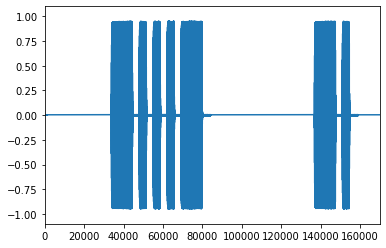

In [14]:
plt.plot(x)
plt.xlim([00000,170000])

In [15]:
import pandas as pd

In [16]:
#https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3
#https://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file
#https://pythonbasics.org/convert-mp3-to-wav/
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
#https://towardsdatascience.com/machine-learning-on-sound-and-audio-data-3ae03bcf5095

In [17]:
for mp3 in audio_files:
    print(input_data+'/'+mp3)

/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130109_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130123_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130206_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130220_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130306_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130320_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130403_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130417_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130501_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130515_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130529_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130612_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130626_10WPM.mp3
/kaggle/input/morse-sound/arrl.org-2013-2015/2013-10/130710_10WPM.mp3
/kaggle/input/morse-

In [18]:
#So we need to make an array of the mp3's as numpy arrays, and an array of the text files, and then we can do some comparison
mp3_df = pd.DataFrame(columns = ['Filename', 'text', 'waveform'])
mp3_df

,Filename,text,waveform


In [19]:
mp3_list = []
for mp3 in audio_files:
    x,sr=a2n.audio_from_file(input_data+'/'+mp3)
    mp3_list.append(x)

In [20]:
mp3_list

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [21]:
#make the array of text files
text_list = []
for text_file in text_files:
    text =str(codecs.open(input_data+'/'+text_file, encoding="ISO-8859-1").read())
    text = text.replace('\r', ' ')
    text = text.replace('\n', '')
    text = text.replace('\x1a', '?')
    ascii_text = text.encode('ascii', 'replace')
    text_list.append(ascii_text)

In [22]:
text_list

[b' ?  NOW 10 WPM  ?  TEXT IS FROM JULY 2012 QST  PAGE 55  ?  TELEVISION WAS POPULAR THE TYPICAL TRANSMISSION LINE WAS OPEN WIRE OR TWISTED PAIR CONNECTED TO A LINK COUPLED TUNED RESONANT CIRCUIT AT THE OUTPUT OF THE TRANSMITTER, USUALLY WITH DIFFERENT PLUG IN COILS FOR EACH BAND.  BY ADJUSTING THE VARIABLE CAPACITOR, SOME ADJUSTMENT COULD BE MADE TO COMPENSATE FOR REACTANCE IN THE LOAD.  IN ADDITION, SOME HAD AN ?  END OF 10 WPM TEXT  ?  QST DE W1AW  ? ?',
 b' ?  NOW 10 WPM  ?  TEXT IS FROM JULY 2012 QST  PAGE 75  ?  HAD A MILITARY BACKGROUND AND WAS A NATURAL LEADER WHO LED BY EXAMPLE TO PUT OUR RAGTAG TEAM TOGETHER TO GET THE JOB DONE.  I PLAYED HOOKY FROM SCHOOL TO HELP SUPPORT THE SEARCH EFFORT NOT SO MUCH OUT OF A SPIRIT OF PUBLIC SERVICE, BUT TO SEE MY FRIENDS AND PLAY RADIO IN THE FIELD.  EACH OF US WAS ASSIGNED TO THE VARIOUS DISCIPLINES OF EMERGENCY MANAGEMENT, LAW ?  END OF 10 WPM TEXT  ?  QST DE W1AW  ? ?',
 b' ?  NOW 10 WPM  ?  TEXT IS FROM JULY 2012 QST  PAGE 55  ?  TELEV

In [23]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(mp3_list), 
                                                    np.array(text_list),
                                                    test_size=0.33,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, 
                                                y_test,
                                                test_size=0.5,
                                                random_state=42)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
